In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import matplotlib.ticker as mtick

### PULLING IN TABLES

In [3]:
demo_2016 = pd.read_csv('organized_data/us_births_2016_demo_counts.csv')
demo_2017 = pd.read_csv('organized_data/us_births_2017_demo_counts.csv')
demo_2018 = pd.read_csv('organized_data/us_births_2018_demo_counts.csv')
demo_2019 = pd.read_csv('organized_data/us_births_2019_demo_counts.csv')
demo_2020 = pd.read_csv('organized_data/us_births_2020_demo_counts.csv')

In [4]:
census_demos = pd.read_csv('organized_data/final_census_pop.csv')

### MERGING TABLES

In [5]:
all_years_demo = pd.concat([demo_2016,demo_2017,demo_2018,demo_2019,demo_2020]).reset_index(drop=True)[['demo_code','births_count','pct_births','demo','year']]

### Normalizing Births to Pop 

In [6]:
yt_female = all_years_demo.loc[all_years_demo.demo == 'White']

In [7]:
his_female = all_years_demo.loc[all_years_demo.demo == 'Hispanic']

In [8]:
aa_female = all_years_demo.loc[all_years_demo.demo == 'Black or African American']

In [9]:
asian_female = all_years_demo.loc[all_years_demo.demo == 'Asian']

In [10]:
two_female = all_years_demo.loc[all_years_demo.demo == 'More than one race']

In [11]:
aian_female = all_years_demo.loc[all_years_demo.demo == 'AIAN']

In [12]:
nhopi_female = all_years_demo.loc[all_years_demo.demo == 'NHOPI']

In [13]:
yt_female_by_year = census_demos.groupby('year')['yt_female_pop_15_54'].sum().to_frame().reset_index()

In [14]:
his_female_by_year = census_demos.groupby('year')['his_female_pop_15_54'].sum().to_frame().reset_index()

In [15]:
aa_female_by_year = census_demos.groupby('year')['aa_female_pop_15_54'].sum().to_frame().reset_index()

In [16]:
asian_female_by_year = census_demos.groupby('year')['asian_female_pop_15_54'].sum().to_frame().reset_index()

In [17]:
two_female_by_year = census_demos.groupby('year')['two_female_pop_15_54'].sum().to_frame().reset_index()

In [18]:
aian_female_by_year = census_demos.groupby('year')['aian_female_pop_15_54'].sum().to_frame().reset_index()

In [19]:
nhopi_female_by_year = census_demos.groupby('year')['nhopi_female_pop_15_54'].sum().to_frame().reset_index()

In [20]:
yt_demo = pd.merge(yt_female, yt_female_by_year, how='inner', on='year')

In [21]:
aa_demo = pd.merge(aa_female, aa_female_by_year, how='inner', on='year')

In [22]:
aian_demo = pd.merge(aian_female, aian_female_by_year, how='inner', on='year')

In [23]:
asian_demo = pd.merge(asian_female, asian_female_by_year, how='inner', on='year')

In [24]:
two_demo = pd.merge(two_female, two_female_by_year, how='inner', on='year')

In [25]:
his_demo = pd.merge(his_female, his_female_by_year, how='inner', on='year')

In [26]:
nhopi_demo = pd.merge(nhopi_female, nhopi_female_by_year, how='inner', on='year')

In [27]:
yt_demo['pct_of_age_pop'] = yt_demo.births_count / yt_demo.yt_female_pop_15_54

In [28]:
aa_demo['pct_of_age_pop'] = aa_demo.births_count / aa_demo.aa_female_pop_15_54

In [29]:
his_demo['pct_of_age_pop'] = his_demo.births_count / his_demo.his_female_pop_15_54

In [30]:
aian_demo['pct_of_age_pop'] = aian_demo.births_count / aian_demo.aian_female_pop_15_54

In [31]:
two_demo['pct_of_age_pop'] = two_demo.births_count / two_demo.two_female_pop_15_54

In [32]:
asian_demo['pct_of_age_pop'] = asian_demo.births_count / asian_demo.asian_female_pop_15_54

In [33]:
nhopi_demo['pct_of_age_pop'] = nhopi_demo.births_count / nhopi_demo.nhopi_female_pop_15_54

In [34]:
yt_demo = yt_demo.rename(columns = {'yt_female_pop_15_54':'female_pop_15_54'})
aa_demo = aa_demo.rename(columns = {'aa_female_pop_15_54':'female_pop_15_54'})
aian_demo = aian_demo.rename(columns = {'aian_female_pop_15_54':'female_pop_15_54'})
his_demo = his_demo.rename(columns = {'his_female_pop_15_54':'female_pop_15_54'})
asian_demo = asian_demo.rename(columns = {'asian_female_pop_15_54':'female_pop_15_54'})
two_demo = two_demo.rename(columns = {'two_female_pop_15_54':'female_pop_15_54'})
nhopi_demo = nhopi_demo.rename(columns = {'nhopi_female_pop_15_54':'female_pop_15_54'})

In [35]:
pct_of_female_pop = pd.concat([yt_demo,aa_demo,aian_demo,his_demo,asian_demo,two_demo,nhopi_demo]).reset_index(drop=True)

### FORMATTING FOR VISUALIZATIONS

In [36]:
pct_of_female_pop.pct_of_age_pop = round((pct_of_female_pop.pct_of_age_pop * 100),2)

In [37]:
all_years_demo.pct_births = round((all_years_demo.pct_births * 100),2)

### VISUALIZATIONS

In [38]:
all_years_demo.to_csv('viz_tables/all_years_demo.csv')

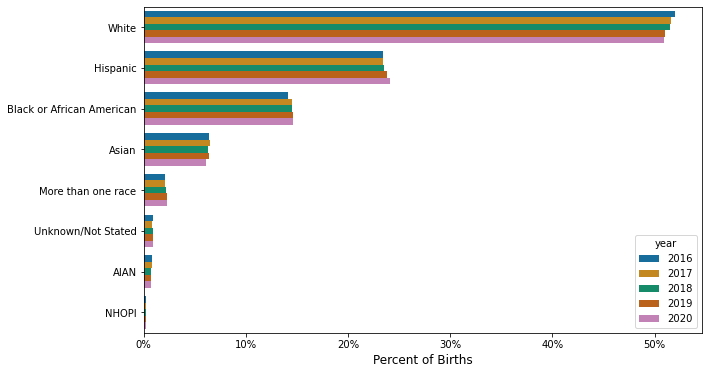

In [39]:
#plt.figure(figsize = (10,6))
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=all_years_demo,
            y= 'demo',
            x= 'pct_births',
            hue = 'year',
            palette = 'colorblind',
            orient = 'h')
ax.xaxis.set_major_formatter('%{x:1.0f}')
ax.set(ylabel='')
plt.xlabel('Percent of Births',fontsize = 12)

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
#plt.xticks(rotation='vertical')

### Normalized Demo

In [40]:
pct_of_female_pop

,demo_code,births_count,pct_births,demo,year,female_pop_15_54,pct_of_age_pop
0,1,2057310,0.520033,White,2016,14629731,14.06
1,1,1993312,0.515767,White,2017,14522234,13.73
2,1,1957260,0.514861,White,2018,14415970,13.58
3,1,1917034,0.510178,White,2019,14294407,13.41
4,1,1844160,0.509461,White,2020,13794644,13.37
5,2,559235,0.141360,Black or African American,2016,3236903,17.28
6,2,561296,0.145235,Black or African American,2017,3201030,17.53
7,2,552630,0.145370,Black or African American,2018,3154161,17.52
8,2,548719,0.146030,Black or African American,2019,3110965,17.64
9,2,530036,0.146426,Black or African American,2020,3042914,17.42


In [41]:
pct_of_female_pop.to_csv('viz_tables/pct_of_female_pop.csv')

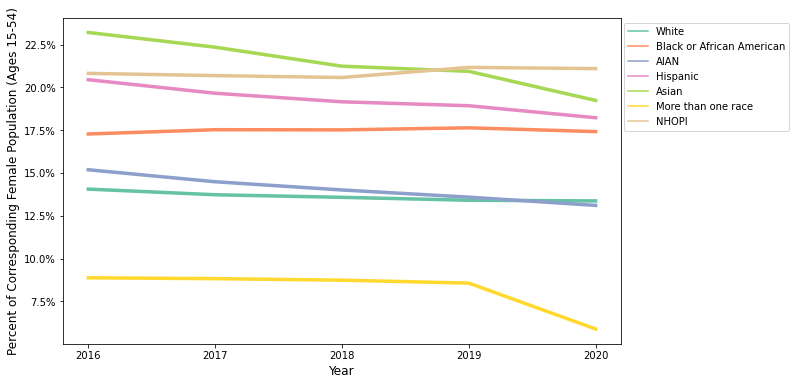

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=pct_of_female_pop,
            y= 'pct_of_age_pop',
            x= 'year',
            hue = 'demo',
            palette = 'Set2',
            linewidth = 3.5)
            #orient = 'h')
ax.yaxis.set_major_formatter('%{y:1.0f}')
ax.set_xticks([2016,2017,2018,2019,2020])
plt.legend(loc='upper right', bbox_to_anchor=(1.31, 1))
plt.ylabel('Percent of Corresponding Female Population (Ages 15-54)',fontsize = 12)
plt.xlabel('Year',fontsize = 12)
#plt.xticks(rotation='vertical')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())